## Question: 
Is trip duration longer during commuting hours?


## Null Hypothesis: 

The average trip duration during commuting hours, 8AM to 9AM and 5PM to 6PM, are the same or shorter than the average trip duration for each hour during the rest of the day. 

## Alternative Hypothesis: 

The average trip duration during commuting hours, 8AM to 9AM and 5PM to 6PM, are significantly longer than the average trip duration for each hour during the rest of the day. 

The significance level will be 0.05.


In [73]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


df = pd.read_csv('/gws/open/Student/citibike/201706-citibike-tripdata.csv.zip')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1


## Figure 1.
The first 5 rows of the citibike trip data for June 2016.

In [74]:
df.drop(['start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True)
df.head()

,tripduration,starttime,stoptime
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38


## Figure 2.
The first 5 rows of the June 2016 citibike trip data redacted to include only data related to
trip duration and time of day. 

In [75]:
df["tripduration_minutes"] = df["tripduration"]/60
df.head()

,tripduration,starttime,stoptime,tripduration_minutes
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,23.283333
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,18.383333
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,30.166667
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,29.333333
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,36.083333


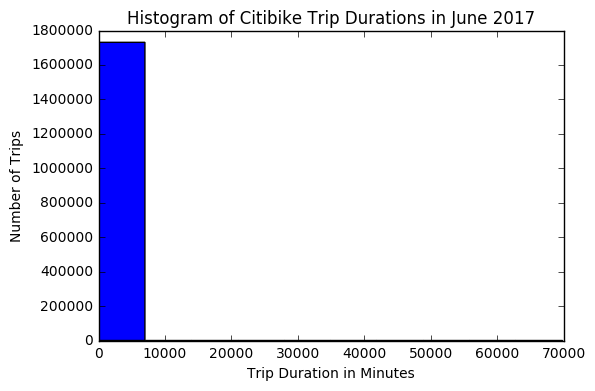

In [76]:
plt.hist(df['tripduration_minutes'])
plt.title("Histogram of Citibike Trip Durations in June 2017")
plt.xlabel("Trip Duration in Minutes")
plt.ylabel("Number of Trips")

## Figure 3. 
The Distribution of Trip Durations

In [77]:
## Eliminating outliers
q = df["tripduration_minutes"].quantile(0.99)
df99 = df[df["tripduration_minutes"] < q]

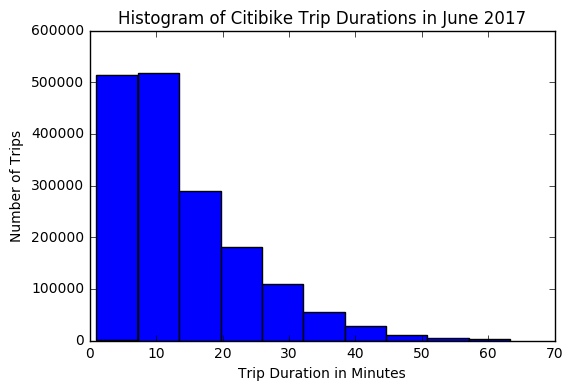

In [78]:
plt.hist(df99["tripduration_minutes"])
plt.title("Histogram of Citibike Trip Durations in June 2017")
plt.xlabel("Trip Duration in Minutes")
plt.ylabel("Number of Trips")

## Figure 4.
The distribution of trip durations, excluding the top .01 quantile

In [79]:
# Grouping by hour and average trip duration
df99["starthour"] = df99['starttime'].str[11:13]
df_byhour = df99.groupby(df99['starthour'])['tripduration_minutes'].mean()
df_byhour = df_byhour.reset_index()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


[0, 23, 10, 15]

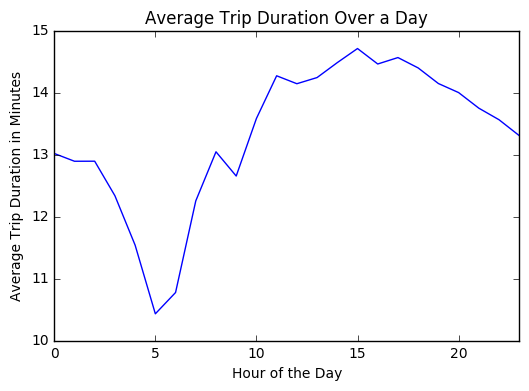

In [80]:
plt.plot(df_byhour['starthour'],df_byhour['tripduration_minutes'])
plt.xlabel("Hour of the Day")
plt.ylabel("Average Trip Duration in Minutes")
plt.title("Average Trip Duration Over a Day")
plt.axis([0,23,10,15])

## Figure 5.

Trip durations for each day in June 2016, averaged over the course of 24 hours